In [1]:
# Load the geotiff

# Now, note that our .tiff image is actually a GEOTIFF. This means that it has geographic information built-in
import cartopy.crs as ccrs
import rasterio

filename = 'LT05_L1TP_153042_19990321_20200908_02_T1_refl.tif'

raster = rasterio.open(filename,'r') # open for reading
landsat = raster.read() # read the image from the rasterio context

print(landsat.shape)
# Note - the landsat image is 3x(ny)x(nx). Reshape the image to be (ny)x(nx)x3 via transpose:
landsat = landsat.transpose((1,2,0))
# Print out the meta-data. This contains information about the value used to fill missing data and some other things.
print(raster.meta)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


(3, 7191, 7911)
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7911, 'height': 7191, 'count': 3, 'crs': CRS.from_epsg(32642), 'transform': Affine(30.0, 0.0, 115185.0,
       0.0, -30.0, 2985915.0)}


# Coordinate system

Based on the information in the metadata for the image and information on epsg.io:

EPSG:32642

WGS 84 / UTM zone 42N

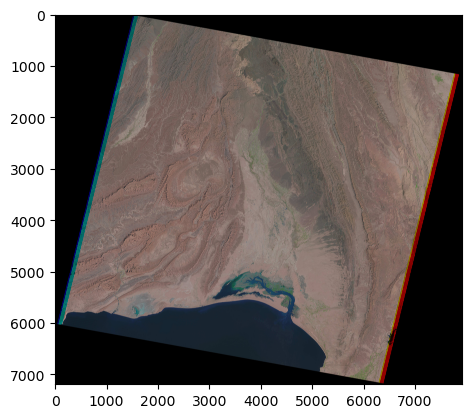

In [2]:
import matplotlib.pyplot as plt
plt.imshow(landsat)
plt.show()

(115185.0, 2985915.0)
(352515.0, 2770185.0)


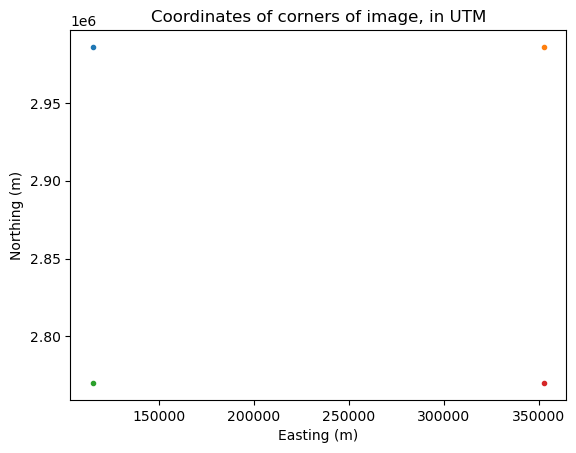

In [3]:
# Get more information about the coordinates
upper_left = raster.transform * (0,0)
lower_right = raster.transform * (raster.width,raster.height)

upper_right = raster.transform * (raster.width,0)
lower_left = raster.transform * (0,raster.height)

print(upper_left)
print(lower_right)
xmin=upper_left[0]
xmax=lower_right[0]
ymin=lower_right[1]
ymax=upper_left[1]

plt.figure()
plt.plot(upper_left[0],upper_left[1],'.')
plt.plot(upper_right[0],upper_right[1],'.')
plt.plot(lower_left[0],lower_left[1],'.')
plt.plot(lower_right[0],lower_right[1],'.')
plt.title('Coordinates of corners of image, in UTM')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.show()

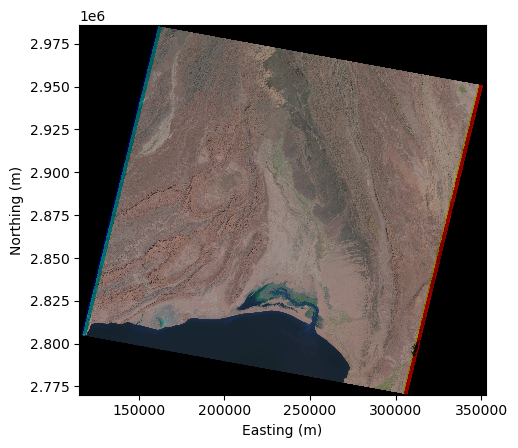

In [5]:
import numpy as np
x_values = np.linspace(lower_left[0],lower_right[0],raster.width)
y_values = np.linspace(upper_left[1],lower_right[1],raster.height)
%matplotlib inline

fig,ax = plt.subplots(1,1)
cm = plt.get_cmap('terrain')
h=ax.pcolorfast(x_values,y_values,landsat,cmap=cm)

ax.set_xlabel('Easting (m)')
ax.set_ylabel('Northing (m)')
ax.set_aspect('equal','box')
plt.show()